## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [46]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

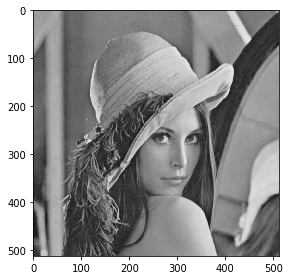

In [47]:
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))
io.imshow(lena_im)

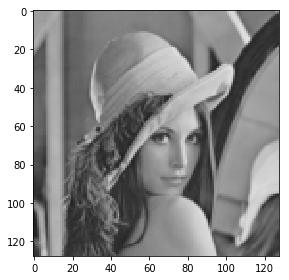

In [48]:
resize_bilinear=misc.imresize(lena_im, 0.25, interp='bilinear')
io.imshow(resize_bilinear)

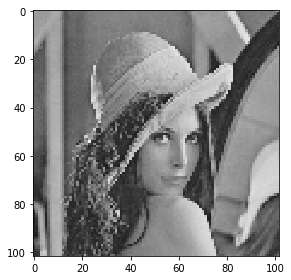

In [49]:
resize_nearest=misc.imresize(lena_im, 20, interp='nearest')
io.imshow(resize_nearest)

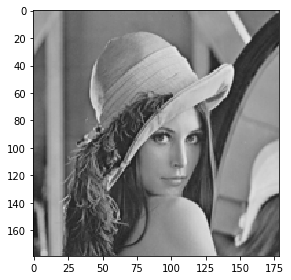

In [50]:
resize_bicubic=misc.imresize(lena_im, 35, interp='bicubic')
io.imshow(resize_bicubic)

**Q.2 Similar to the function of `my_blending.m` that you saw before define your function of blending ** 

**Therefore define three functions `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


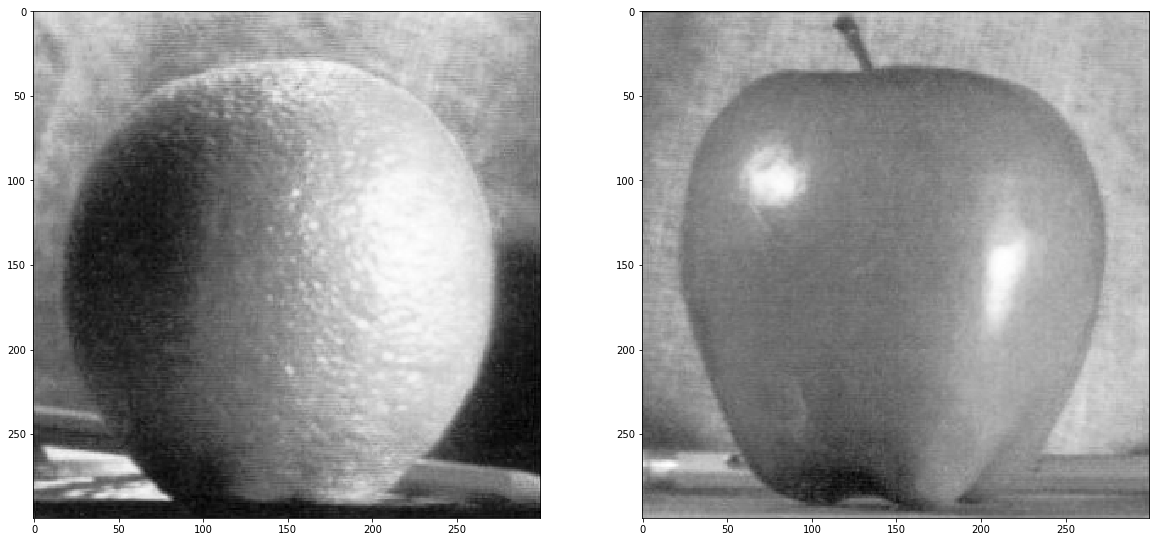

In [51]:
img_path = './images/'
img_name = 'orange.jpeg'
orange_im = io.imread(img_path.__add__(img_name), as_grey=True)

img_path = './images/'
img_name = 'apple.jpeg'
apple_im = io.imread(img_path.__add__(img_name), as_grey=True)


fig, axes = plt.subplots(1,2, figsize=(20, 20))
axes = axes.ravel()
axes[0].imshow(orange_im, cmap= cm.Greys_r)
axes[1].imshow(apple_im, cmap= cm.Greys_r)

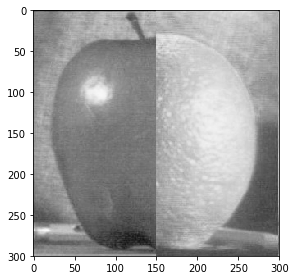

In [52]:
def simple_blend(image1, image2):
    if(image1.shape != image2.shape):
        image1 = misc.imresize(image1, np.shape(image2), 'bilinear')
        
    blended_img = image1 #np.zeros(image1.shape)
    row, col = image1.shape
    blended_img = image1 #np.zeros(image1.shape)
    row, col = image1.shape
    mid = int(round(col/2))
    blended_img [:, mid:-1]  = image2[:, mid:-1]
    
    return blended_img

orange_grey = io.imread('images/orange.jpeg', as_grey = True)
apple_grey = io.imread('images/apple.jpeg', as_grey = True)

blended_fruits = simple_blend(img_as_float(apple_grey), img_as_float(orange_grey))

io.imshow(blended_fruits, cmap = cm.Greys_r)


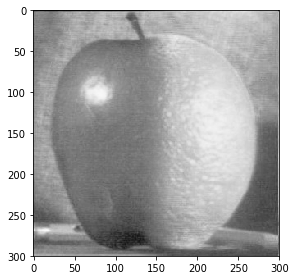

In [53]:
def alpha_blend(image1, image2):
    if(image1.shape != image2.shape):
        image1 = misc.imresize(image1, np.shape(image2), 'bilinear')
        
    blended_img = image1
    row, col = image1.shape
    
    mid = int(round(col/2))
    win = 20
    x1 = int(np.ceil(col/2)- win)
    x2 = int(np.ceil(col/2)+ win)
    x =  np.arange(x1,x2)
    alpha = (x-x2)/(x1-x2)   #2*wind instead of x2-x1
    
    blended_img [:, x1:x2]  = alpha * image1[:, x1:x2] + (1-alpha) * image2 [:, x1:x2]    
    blended_img [:,x2:-1] = image2[:,x2:-1]       
    
    return blended_img

orange_grey = io.imread('images/orange.jpeg', as_grey = True)
apple_grey = io.imread('images/apple.jpeg', as_grey = True)

blended_fruits = alpha_blend(img_as_float(apple_grey), img_as_float(orange_grey))

io.imshow(blended_fruits, cmap = cm.Greys_r)


C:\Users\DoN\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


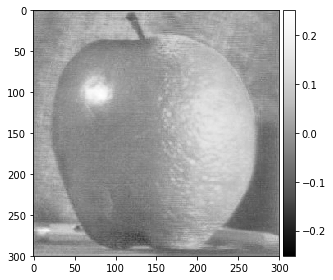

In [54]:

def pyramid_blend(image1, image2):
    mask  = np.zeros(image1.shape)
    win = 10
    row, col = mask.shape
    mask[:,1:col//2 -win] = 1
    x1 = int(col//2 - win)
    x2 = int(col//2 + win)
    x= np.arange(x1,x2)
    mask [:, x1 : x2 ] = (x - x2)/( x1 - x2)
    
    image1_laplacian = list( transform.pyramid_laplacian(image1))
    
    image2_laplacian = list(transform.pyramid_laplacian(image2))

    blended = []
    for i in range(len(image1_laplacian)):
        temp1 = image1_laplacian[i] * transform.resize(mask, image1_laplacian[i].shape)
        temp2 = image2_laplacian[i] * (1 - transform.resize(mask,image1_laplacian[i].shape))
        
        blended.append( temp1 + temp2  )
      
    restored = blended[len(blended)-1]
    
    for i in range(len(blended)-1, 0, -1):
        restored = transform.resize(restored, blended[i-1].shape) + blended[i-1]
               
    return restored

orange_grey = io.imread('images/orange.jpeg', as_grey = True)
apple_grey = io.imread('images/apple.jpeg', as_grey = True)

blended_fruits = pyramid_blend(img_as_float(apple_grey), img_as_float(orange_grey))

io.imshow(blended_fruits, cmap = cm.Greys_r)
